In [749]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [750]:
dataset= pd.read_csv('Heart_Disease_Prediction.csv')
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [751]:
dataset = dataset[['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium','Heart Disease']]
dataset.head()
dataset.shape

(270, 14)

In [752]:
x = np.asarray(dataset[['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']])
x


array([[70.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  0.,  3., ...,  2.,  0.,  7.],
       [57.,  1.,  2., ...,  1.,  0.,  7.],
       ...,
       [56.,  0.,  2., ...,  2.,  0.,  3.],
       [57.,  1.,  4., ...,  2.,  0.,  6.],
       [67.,  1.,  4., ...,  2.,  3.,  3.]])

In [753]:

y = dataset[['Heart Disease']].values
y[0:2]




array([['Presence'],
       ['Absence']], dtype=object)

In [754]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)


In [755]:
Disease = preprocessing.LabelEncoder()
Disease.fit(['Presence','Absence'])
y


array([['Presence'],
       ['Absence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Presence'],
       ['Presence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Absence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Presence'],
       ['Presence'],
       ['Presence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Absence'],
       ['Absence'],
       ['Absence'],
       ['Presence'],
       ['Absence'],
       ['Presence'],
       ['Presence'],
       ['Presence']

In [756]:
y[:,0] = Disease.transform(y[:,0])


In [757]:

y

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [758]:
y = y.reshape(-1)
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1], dtype=object)

In [759]:
y = y.astype(int)

In [760]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (216, 13) (216,)
Test set: (54, 13) (54,)


In [761]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
logist = LogisticRegression(C=0.1,solver='newton-cg').fit(x_train,y_train)
logist

LogisticRegression(C=0.1, solver='newton-cg')

In [762]:
yhat = logist.predict(x_test)
yhat

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [763]:
yhat_prob = logist.predict_proba(x_test)
yhat_prob

array([[0.97, 0.03],
       [0.16, 0.84],
       [0.98, 0.02],
       [0.46, 0.54],
       [0.06, 0.94],
       [0.86, 0.14],
       [0.26, 0.74],
       [0.96, 0.04],
       [0.9 , 0.1 ],
       [0.28, 0.72],
       [0.02, 0.98],
       [0.86, 0.14],
       [0.67, 0.33],
       [0.03, 0.97],
       [0.14, 0.86],
       [0.89, 0.11],
       [0.84, 0.16],
       [0.91, 0.09],
       [0.11, 0.89],
       [0.8 , 0.2 ],
       [0.76, 0.24],
       [0.89, 0.11],
       [0.87, 0.13],
       [0.92, 0.08],
       [0.47, 0.53],
       [0.57, 0.43],
       [0.05, 0.95],
       [0.21, 0.79],
       [0.81, 0.19],
       [0.94, 0.06],
       [0.93, 0.07],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.66, 0.34],
       [0.92, 0.08],
       [0.76, 0.24],
       [0.6 , 0.4 ],
       [0.85, 0.15],
       [0.97, 0.03],
       [0.63, 0.37],
       [0.91, 0.09],
       [0.13, 0.87],
       [0.94, 0.06],
       [0.35, 0.65],
       [0.81, 0.19],
       [0.3 , 0.7 ],
       [0.02, 0.98],
       [0.86,

In [764]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5945945945945946

In [765]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5806464419685786

In [766]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[17 11]
 [ 4 22]]


Confusion matrix, without normalization
[[17 11]
 [ 4 22]]


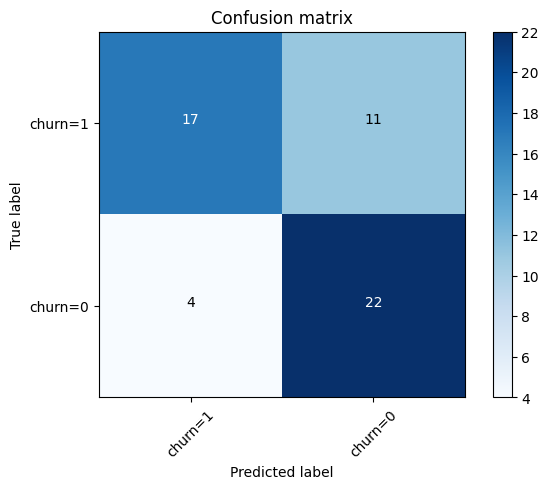

In [767]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')